**Imports**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DateTime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Case 1: Predicting TSLA stock prices**

In [3]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
...,...,...,...,...,...,...,...
246,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
247,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
248,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
249,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


**Model 1:**

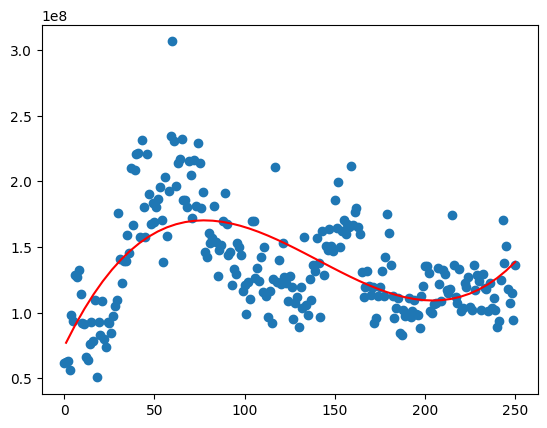

0.3523640490081277


In [20]:
x = []
y = []
for i in range(251):
    x.append(i)
    y.append(int(df.loc[i, "Volume"]))

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 250)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), color = 'red')
plt.show()
print(metrics.r2_score(y, mymodel(x)))

An r-squared value of 0.352 indicate that it is a relationship.

In [35]:
date = input("Write a date on the form yy-mm-dd.")
try:
    date = dt.DateTime(date)
    date0 = df.loc[0, "Date"]
    date0 = dt.DateTime(date0)
    date_value = int(date - date0)

    if date_value >= 0:
        print("In the date " + str(date) + " the stock volume wil be " + 
             str(int(mymodel(date_value))) + ", according to this model.")

    else:
        print("The input date is negative!")

except:
    print("The input value is not convertible!")

In the date 2024/01/10 00:00:00 GMT+0 the stock volume wil be 1461888023, according to this model.
